# WeatherPy

---

## Analysis

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import requests
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List Using the citipy Library

In [2]:
# Empty list for holding the latitude adn longitude combinations

lat_lngs = []

# Empty list for holding the cities names

cities = []

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a out cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


----

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated

In [3]:
from api_keys import weather_api_key


In [4]:
# Set the API base url

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city

city_data = []

# Print to logger

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters

record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i,city in enumerate(cities):
# for city in cities:
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
        
    # Create endpoint URL with each city
    city_url = query_url + (city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    
    # Run an API request for each of the cities
    try:   
        # Parse the JSON and retrieve data
        city_weather=requests.get(city_url).json()
    
        # Parse out latitude,longitude,max temp,humidity,cloudiness, windspeed, country
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City":city,
                         "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness":city_clouds,
                          "Wind Speed":city_wind,
                          "Country":city_country,
                          "Date":city_date })
    
    # If an error is experienced, skip the city 
    except:
        print("City not found. Skipping...")
        pass        

# Indicate that Data Loading is complete
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | newman
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | bairnsdale
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | porto franco
Processing Record 10 of Set 1 | constantia
Processing Record 11 of Set 1 | chegdomyn
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | selfoss
Processing Record 15 of Set 1 | ternate
Processing Record 16 of Set 1 | pamandzi
Processing Record 17 of Set 1 | talara
Processing Record 18 of Set 1 | narasannapeta
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | guasave
Processing Record 22 of Set 1 | mao
Processing Record 23 of Set 1 | shingu

Processing Record 38 of Set 4 | ad dabbah
Processing Record 39 of Set 4 | mahina
Processing Record 40 of Set 4 | whitby
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | ishinomaki
Processing Record 43 of Set 4 | howrah
Processing Record 44 of Set 4 | tolanaro
Processing Record 45 of Set 4 | qashyr
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | akrehamn
Processing Record 48 of Set 4 | nyurba
Processing Record 49 of Set 4 | amga
Processing Record 0 of Set 5 | ludington
Processing Record 1 of Set 5 | walvis bay
Processing Record 2 of Set 5 | ts'nori
Processing Record 3 of Set 5 | yuzhno-kurilsk
Processing Record 4 of Set 5 | st. john's
Processing Record 5 of Set 5 | new norfolk
Processing Record 6 of Set 5 | konosha
Processing Record 7 of Set 5 | sinabang
Processing Record 8 of Set 5 | kapuskasing
Processing Record 9 of Set 5 | altamira
Processing Record 10 of Set 5 | glace bay
Processing Record 11 of Set 5 | keflavik
Processing Record 12 o

Processing Record 30 of Set 8 | faya-largeau
Processing Record 31 of Set 8 | sarkand
Processing Record 32 of Set 8 | westport
Processing Record 33 of Set 8 | nouadhibou
Processing Record 34 of Set 8 | mogadishu
Processing Record 35 of Set 8 | chabahar
Processing Record 36 of Set 8 | kangding
Processing Record 37 of Set 8 | neiafu
Processing Record 38 of Set 8 | lisala
Processing Record 39 of Set 8 | sao jose da coroa grande
Processing Record 40 of Set 8 | luena
Processing Record 41 of Set 8 | lautoka
Processing Record 42 of Set 8 | lesozavodsk
Processing Record 43 of Set 8 | bonnyville
Processing Record 44 of Set 8 | turpan
Processing Record 45 of Set 8 | dukhan
Processing Record 46 of Set 8 | colonia
Processing Record 47 of Set 8 | ghadamis
Processing Record 48 of Set 8 | luderitz
Processing Record 49 of Set 8 | betio village
Processing Record 0 of Set 9 | hobyo
Processing Record 1 of Set 9 | lodwar
Processing Record 2 of Set 9 | chibougamau
Processing Record 3 of Set 9 | chapada dos 

City not found. Skipping...
Processing Record 20 of Set 12 | richards bay
Processing Record 21 of Set 12 | dalton
Processing Record 22 of Set 12 | pont rouge
Processing Record 23 of Set 12 | wloclawek
Processing Record 24 of Set 12 | pestretsy
Processing Record 25 of Set 12 | tabou
Processing Record 26 of Set 12 | manatutu
City not found. Skipping...
Processing Record 27 of Set 12 | klerksdorp
Processing Record 28 of Set 12 | qingyuan
Processing Record 29 of Set 12 | vernon
Processing Record 30 of Set 12 | hirara
Processing Record 31 of Set 12 | hastings
Processing Record 32 of Set 12 | prieska
Processing Record 33 of Set 12 | thinadhoo
------------------------------
Data Retrieval Complete       
------------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [6]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.79,86,100,4.47,NZ,1690937897
1,newman,37.3138,-121.0208,38.19,37,46,0.89,US,1690937897
2,utrik,11.2278,169.8474,28.51,75,100,7.04,MH,1690937897
3,bairnsdale,-37.8333,147.6167,12.25,82,3,0.81,AU,1690937608
4,grytviken,-54.2811,-36.5092,-2.66,91,100,2.28,GS,1690937898


In [7]:
# Export the City_Data into a csv

city_data_df.to_csv("cities.csv",index_label="City_ID")

In [8]:
# Read saved data

city_data_df=pd.read_csv("cities.csv",index_col="City_ID")

# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,86,100,4.47,NZ,1690937897
1,newman,37.3138,-121.0208,38.19,37,46,0.89,US,1690937897
2,utrik,11.2278,169.8474,28.51,75,100,7.04,MH,1690937897
3,bairnsdale,-37.8333,147.6167,12.25,82,3,0.81,AU,1690937608
4,grytviken,-54.2811,-36.5092,-2.66,91,100,2.28,GS,1690937898


### Create the Scatter Plot

#### Latitude vs. Temperature

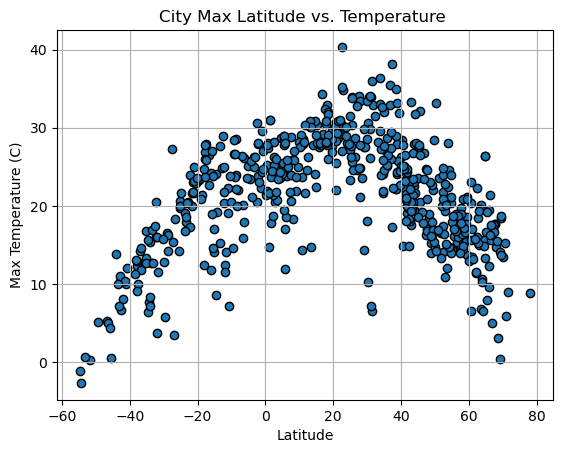

In [9]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor ="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature ")
plt.grid(True)
plt.savefig("Fig!.png")
plt.show()
            

#### Latitude vs. Humidity

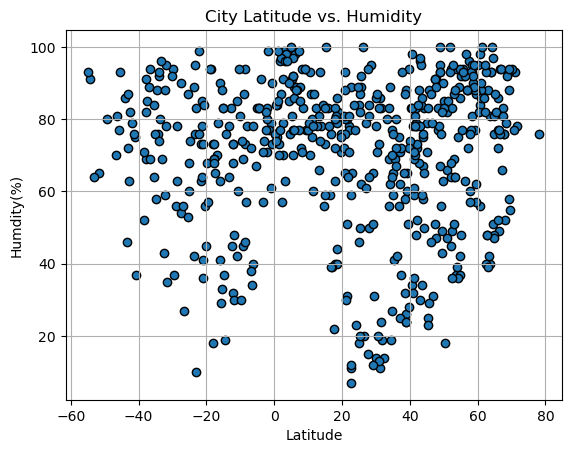

In [10]:
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor ="black")
plt.grid(True)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humdity(%)")
plt.savefig("Fig2.png")
plt.show()

#### Latitude vs. Cloudiness

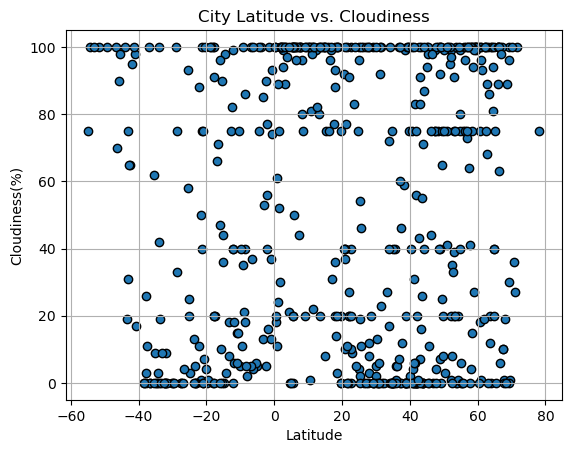

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor ="black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")
plt.savefig("Fig3.png")
plt.show()

#### Latitude vs. Wind Speed

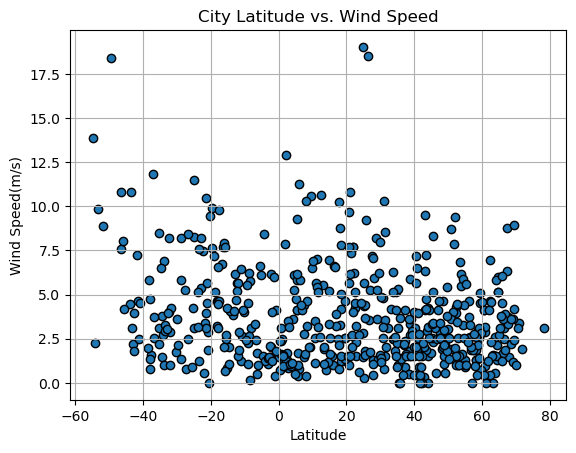

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolor ="black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.savefig("Fig4png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def regress_values(x_axis,slope,intercept):
    regress_values = x_axis * slope + intercept
    return regress_values

In [14]:
def line_eq(slope,intercept):
    line_eq =  "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return line_eq

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,newman,37.3138,-121.0208,38.19,37,46,0.89,US,1690937897
2,utrik,11.2278,169.8474,28.51,75,100,7.04,MH,1690937897
9,constantia,44.1833,28.6500,19.38,83,87,4.22,RO,1690937899
10,chegdomyn,51.1167,133.0167,23.62,66,41,1.91,RU,1690937899
11,ust-nera,64.5667,143.2000,15.63,51,81,2.13,RU,1690937899


In [16]:
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]
southern_hemi_df.head()                      

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,86,100,4.47,NZ,1690937897
3,bairnsdale,-37.8333,147.6167,12.25,82,3,0.81,AU,1690937608
4,grytviken,-54.2811,-36.5092,-2.66,91,100,2.28,GS,1690937898
5,adamstown,-25.0660,-130.1015,20.66,60,25,8.27,PN,1690937898
6,coquimbo,-29.9533,-71.3436,12.85,94,0,3.60,CL,1690937473


# Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.3376988622747027.


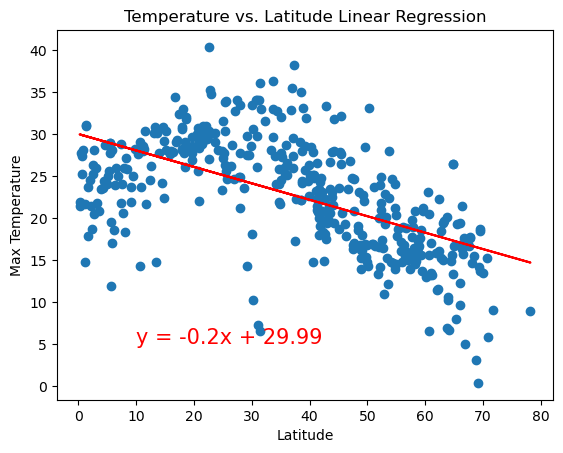

In [17]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_values,y_values)
temp_vs_lat=regress_values(x_values,slope,intercept)
temp_lat_line=line_eq(slope,intercept)

plt.scatter(x_values,y_values)
plt.plot(x_values,temp_vs_lat,"r-")
plt.title("Temperature vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(temp_lat_line,(10,5),fontsize=15,color="red")
print(f"The r-value is : {rvalue**2}.")
plt.show()

The r-value is : 0.606339736877932.


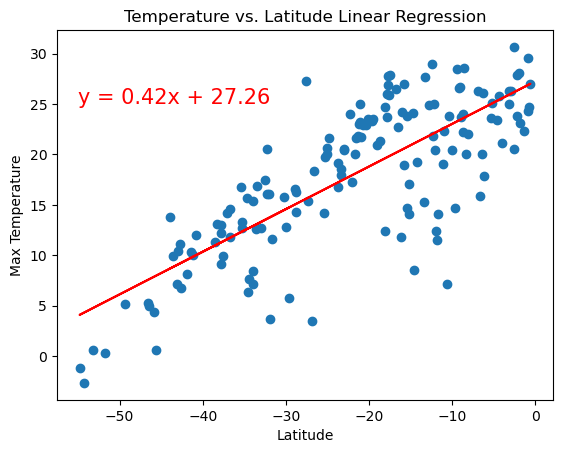

In [26]:
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_axis,y_axis)
south_temp_vs_lat=regress_values(x_axis,slope,intercept)
south_temp_lat_line=line_eq(slope,intercept)

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,south_temp_vs_lat,"r-")
plt.title("Temperature vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(south_temp_lat_line,(-55,25),fontsize=15,color="red")
print(f"The r-value is : {rvalue**2}.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Humidity vs. Latitude Linear Regreesion Plot

The r-value is : 0.0003398692761371665.


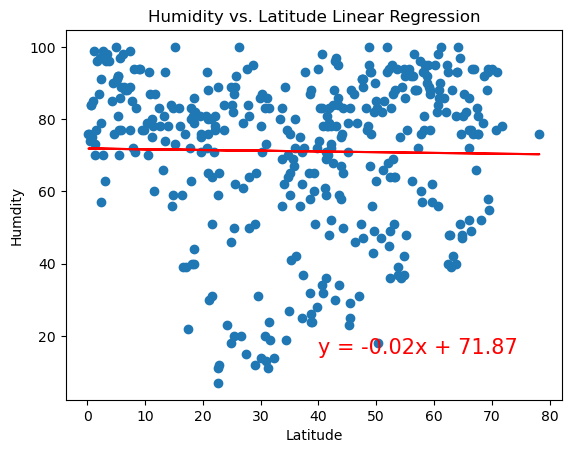

In [19]:
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_axis,y_axis)
nor_lat_hum_regress=regress_values(x_axis,slope,intercept)
nor_lat_hum_line=line_eq(slope,intercept)

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,nor_lat_hum_regress,"r-")
plt.title("Humidity vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humdity')
plt.annotate(nor_lat_hum_line,(40,15),fontsize=15,color="red")
print(f"The r-value is : {rvalue**2}.")
plt.show()

The r-value is : 0.01758397416213495.


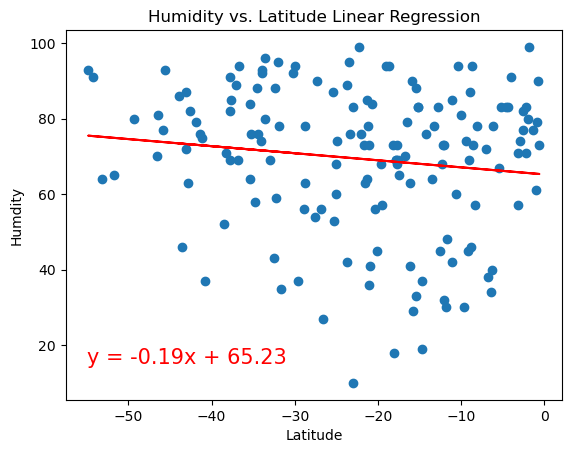

In [20]:
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_axis,y_axis)
south_lat_hum_regress=regress_values(x_axis,slope,intercept)
south_lat_hum_line=line_eq(slope,intercept)

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,south_lat_hum_regress,"r-")
plt.title("Humidity vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humdity')
plt.annotate(south_lat_hum_line,(-55,15),fontsize=15,color="red")
print(f"The r-value is : {rvalue**2}.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.005980908720657144.


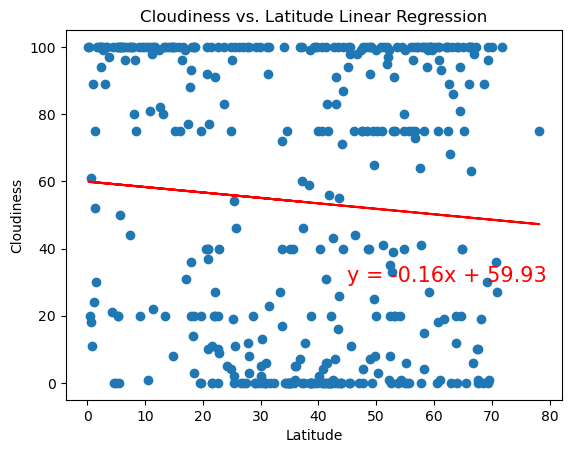

In [21]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_axis,y_axis)
nor_lat_cloud_regress=regress_values(x_axis,slope,intercept)
nor_lat_cloud_line=line_eq(slope,intercept)

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,nor_lat_cloud_regress,"r-")
plt.title("Cloudiness vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(nor_lat_cloud_line,(45,30),fontsize=15,color="red")
print(f"The r-value is : {rvalue**2}.")
plt.show()

The r-value is : 0.001662109571325945.


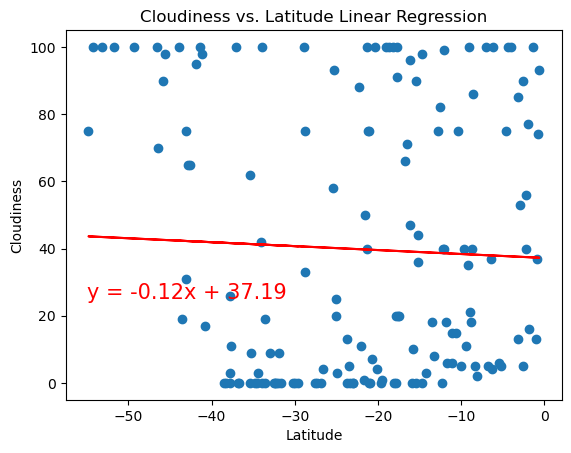

In [22]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_axis,y_axis)
south_lat_cloud_regress=regress_values(x_axis,slope,intercept)
south_lat_cloud_line=line_eq(slope,intercept)

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,south_lat_cloud_regress,"r-")
plt.title("Cloudiness vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(south_lat_cloud_line,(-55,25),fontsize=15,color="red")
print(f"The r-value is : {rvalue**2}.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.019000723832565194.


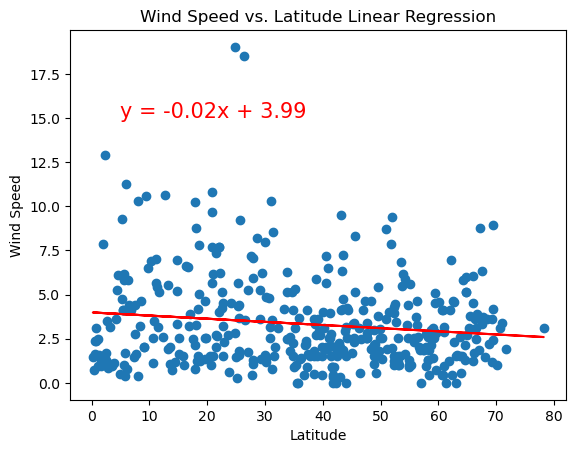

In [25]:
# Northern Hemisphere

x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_axis,y_axis)
nor_lat_wind_regress=regress_values(x_axis,slope,intercept)
nor_lat_wind_line=line_eq(slope,intercept)

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,nor_lat_wind_regress,"r-")
plt.title("Wind Speed vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(nor_lat_wind_line,(5,15),fontsize=15,color="red")
print(f"The r-value is : {rvalue**2}.")
plt.show()

The r-value is : 0.0963976943890795.


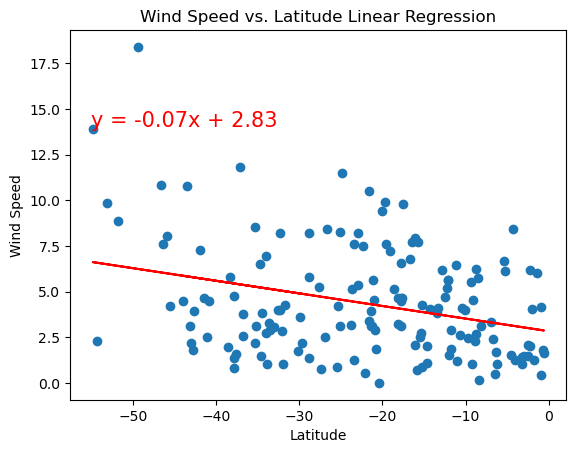

In [24]:
# Southern Hemisphere

x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_axis,y_axis)
south_lat_wind_regress=regress_values(x_axis,slope,intercept)
south_lat_wind_line=line_eq(slope,intercept)

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,south_lat_wind_regress,"r-")
plt.title("Wind Speed vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(south_lat_wind_line,(-55,14),fontsize=15,color="red")
print(f"The r-value is : {rvalue**2}.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE